# **Regularization** — _Avoid Overfitting_

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


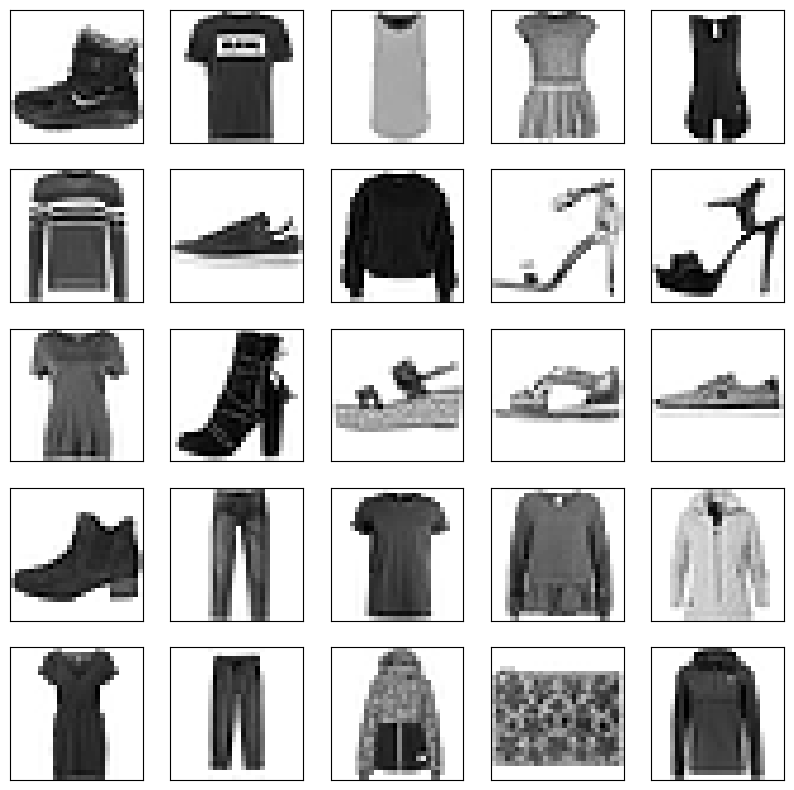

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='binary')
plt.show()


## **Processing the data**

Orignial label ``[7]`` is converted to One-hot encoded label ``[0,0,0,0,0,0,1,0,0]``

In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
import numpy as np
x_train = np.reshape(x_train, (60000, 28 * 28))
x_test = np.reshape(x_test, (10000, 28 * 28))

x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
np.max(x_train)

255

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
np.max(x_train)

1.0

## **Regularization and dropout**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [11]:
nodes = 64

# Weight regularization to keep the weights small
def create_model(weight_reg=False, dropout_reg=False):
  model = Sequential()
  if weight_reg:
    model.add(Dense(nodes, activation='relu', input_shape=(784,),
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(nodes, activation='relu', kernel_regularizer=l2(0.01)))
  else:
    model.add(Dense(nodes, activation='relu', input_shape=(784,)))
    model.add(Dense(nodes, activation='relu', input_shape=(784,)))
  if dropout_reg:
    model.add(Dropout(0.2)) # randomly select nodes with probability 0.2
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  model.summary()
  return model

In [12]:
def show_acc(h, E):
  plt.plot(range(E), h.history['acc'], label='Training')
  plt.plot(range(E), h.history['val_acc'], label='Validation')
  plt.ylim([0.7, 1.0])
  plt.legend()
  plt.show()

In [13]:
# simple_log = LambdaCallback(on_epoch_end = Lambda e, L: print(e, end='.'))

def run_experiment(E=20, weight_reg=False, drop_reg=False):
  m=create_model(weight_reg, drop_reg)
  h = m.fit(
    x_train, y_train,
    epochs=E,
    validation_data=(x_test, y_test),
    verbose=True
  )
  show_acc(h, E)
  

## **Results — without regularization**

Model overfits since there is a sizeable difference between the training accuracy and the validation accuracy (validation is actually dropping while training is increasing).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2023-04-12 22:12:38.980175: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 904us/step - loss: 0.5033 - acc: 0.8210 - val_loss: 0.4375 - val_acc: 0.8376
Epoch 2/20
1875/1875 [==============================] - 2s 827us/step - loss: 0.3754 - acc: 0.8631 - val_loss: 0.3881 - val_acc: 0.8601
Epoch 3/20
1875/1875 [==============================] - 2s 938us/step - loss: 0.3391 - acc: 0.8749 - val_loss: 0.3612 - val_acc: 0.8695
Epoch 4/20
1875/1875 [==============================] - 2s 885us/step - loss: 0.3185 - acc: 0.8839 - val_loss: 0.3574 - val_acc: 0.8694
Epoch 5/20
1875/1875 [==============================] - 1s 779us/step - loss: 0.3017 - acc: 0.8881 - val_loss: 0.3720 - val_acc: 0.8630
Epoch 6/20
1875/1875 [==============================] - 1s 769us/step - loss: 0.2882 - acc: 0.8930 - val_loss: 0.3493 - val_acc: 0.8741
Epoch 7/20
1875/1875 [==============================] - 1s 748us/step - loss: 0.2761 - acc: 0.8973 - val_loss: 0.3430 - val_acc: 0.8781
Epoch 8/20
1875/1875 [==============================] - 1s 

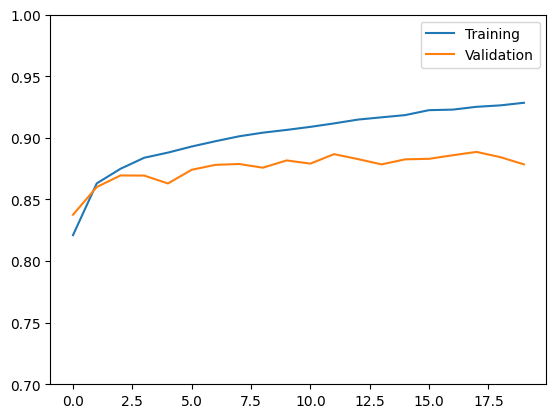

In [14]:
run_experiment()

## **Results — with regularization**

Training and validation accuracy are close

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 2s 850us/step - loss: 0.8076 - acc: 0.7952 - val_loss: 0.6266 - val_acc: 0.8202
Epoch 2/20
1875/1875 [========================

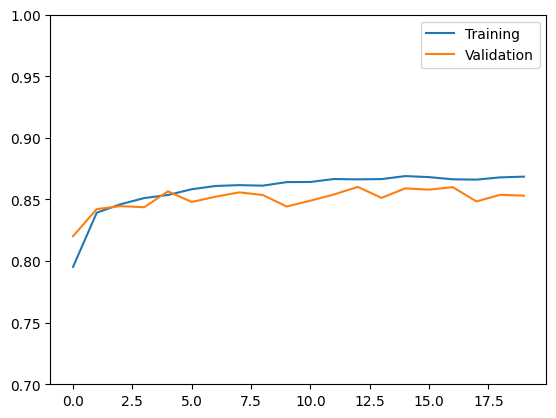

In [15]:
run_experiment(weight_reg=True, drop_reg=True)

## **Results — weight decay only**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 2s 915us/step - loss: 0.7908 - acc: 0.8117 - val_loss: 0.6501 - val_acc: 0.8220
Epoch 2/20
1875/1875 [==============================] - 2s 847us/step - loss: 0.5713 - acc: 0.8436 - val_loss: 0.5667 - val_acc: 0.8415
Epoch 3/20
1875/1875 [====================

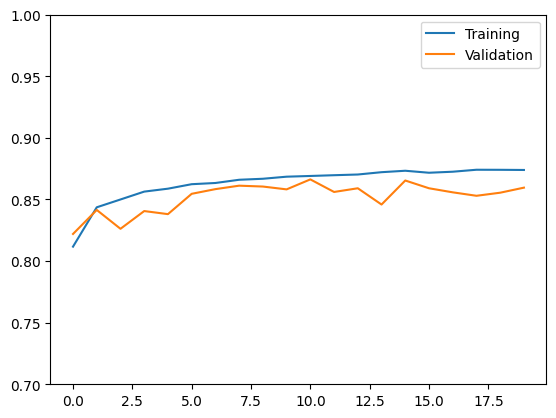

In [16]:
run_experiment(weight_reg=True, drop_reg=False)

## **Results — dropout only**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 2s 851us/step - loss: 0.5566 - acc: 0.8042 - val_loss: 0.4144 - val_acc: 0.8513
Epoch 2/20
1875/1875 [========================

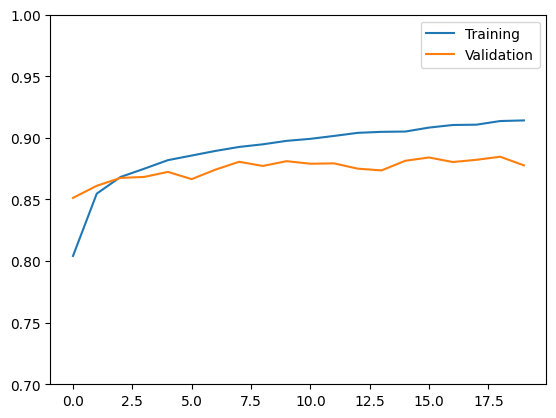

In [17]:
run_experiment(weight_reg=False, drop_reg=True)